In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#LOADING THE DATASET
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [3]:
house_price_dataframe = pd.DataFrame(house_price_dataset.data,columns = house_price_dataset.feature_names)

In [4]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
house_price_dataframe['Price'] = house_price_dataset.target

In [6]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
house_price_dataframe.shape

(20640, 9)

In [8]:
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [9]:
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
correlation = house_price_dataframe.corr()

<Axes: >

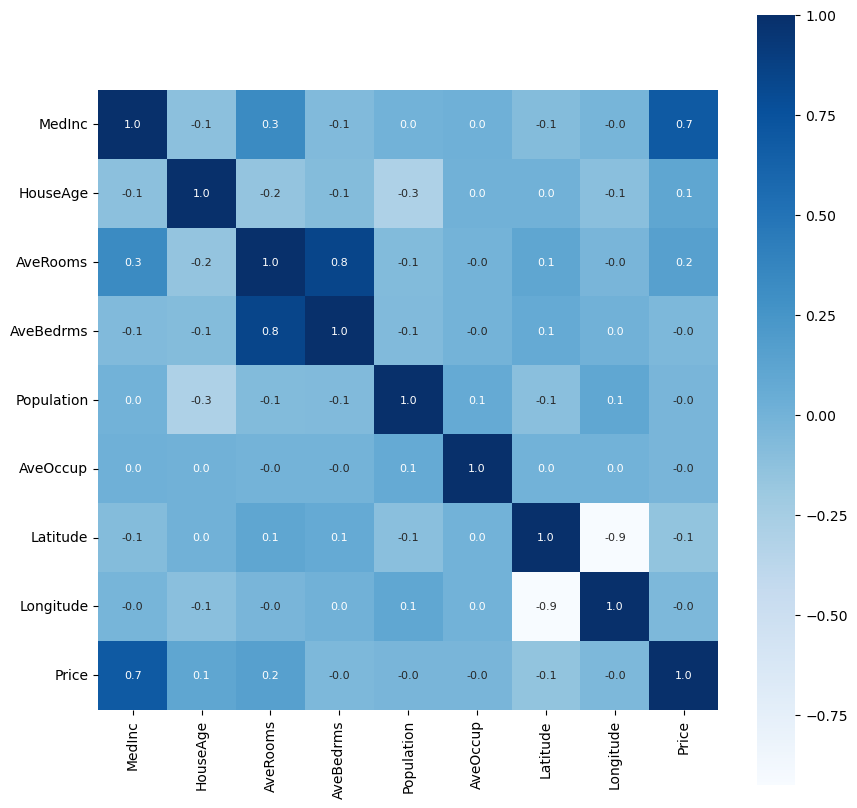

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar = True,square = True,fmt = '.1f',annot = True,annot_kws = {'size':8},cmap = 'Blues')

In [12]:
X = house_price_dataframe.drop(['Price'],axis = 1)
Y = house_price_dataframe['Price']

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [14]:
print(X.shape,X_train.shape,X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train,Y_train)

LinearRegression()

In [17]:
training_data_prediction = model.predict(X_train)

In [18]:
print(training_data_prediction)

[0.58807542 3.17425069 0.96796179 ... 1.53687806 1.78476947 1.21883569]


In [19]:
score_1 = metrics.r2_score(Y_train,training_data_prediction)
score_2 = metrics.mean_absolute_error(Y_train,training_data_prediction)
print("R Squared error:",score_1)
print("Mean Absolute error:",score_2)

R Squared error: 0.6068205998456939
Mean Absolute error: 0.5303857028686886


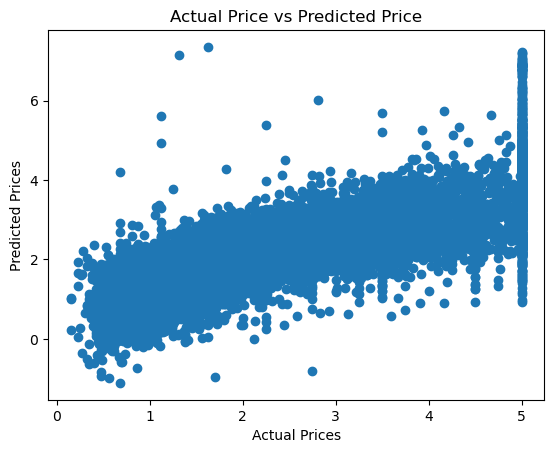

In [20]:
#SCATTER PLOT FOR TRAINING DATA
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()


In [21]:
test_data_prediction = model.predict(X_test)

In [22]:
score_1 = metrics.r2_score(Y_test,test_data_prediction)
score_2 = metrics.mean_absolute_error(Y_test,test_data_prediction)
print("R Squared error",score_1)
print("Mean Absolure error:",score_2)

R Squared error 0.6013853272055154
Mean Absolure error: 0.5358292549657752


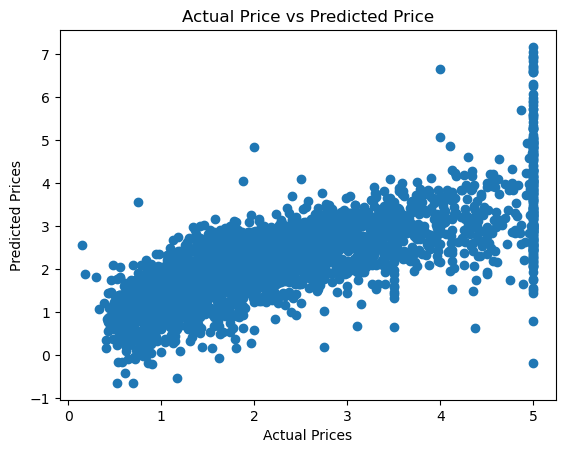

In [23]:
#SCATTER PLOT FOR TEST DATA
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()